In [2]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import os

In [15]:
folder_path = ".."

In [16]:
csv_files = sorted(glob.glob(os.path.join(folder_path, "*.csv")))

In [17]:
len(csv_files)

8

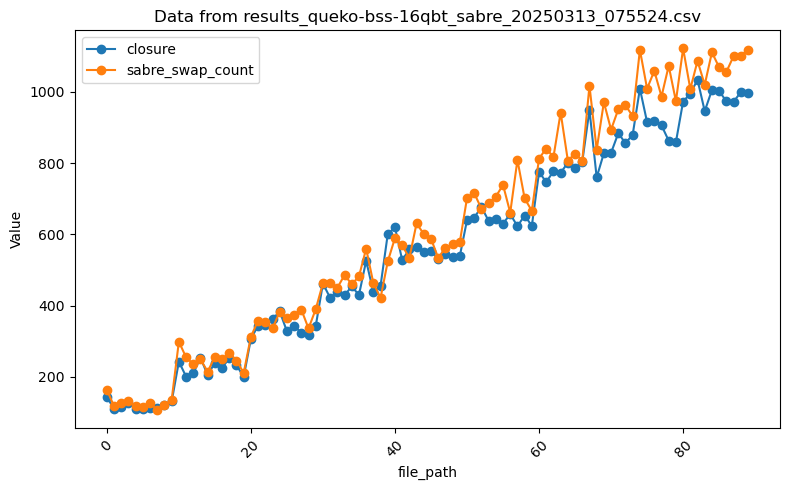

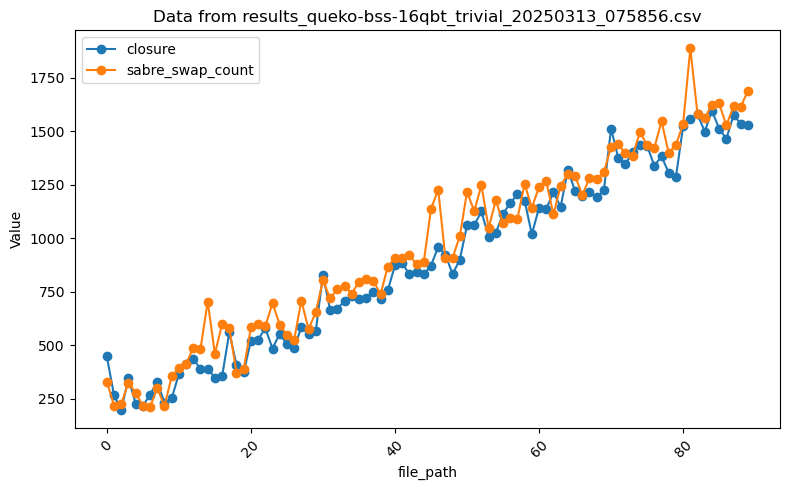

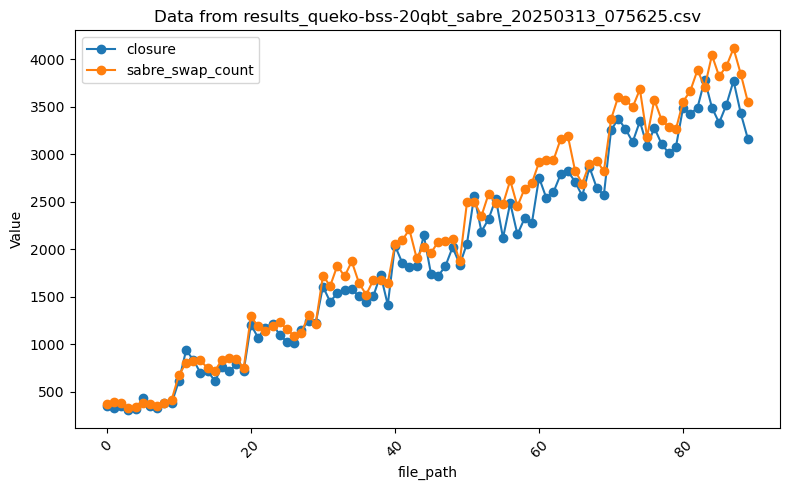

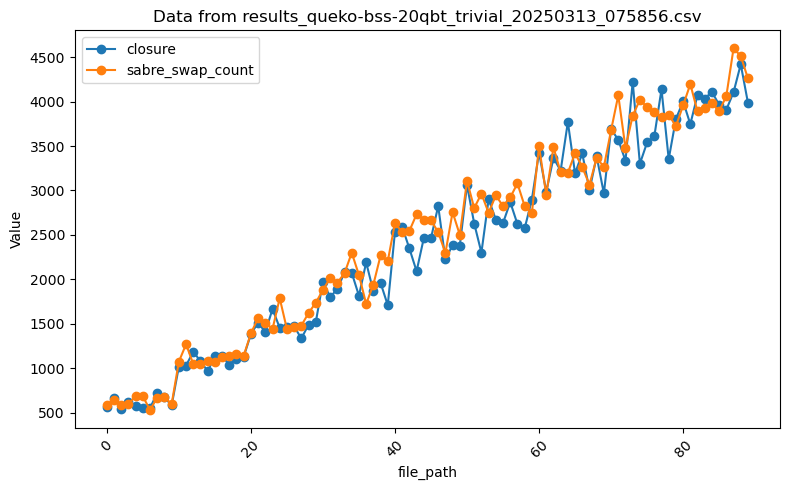

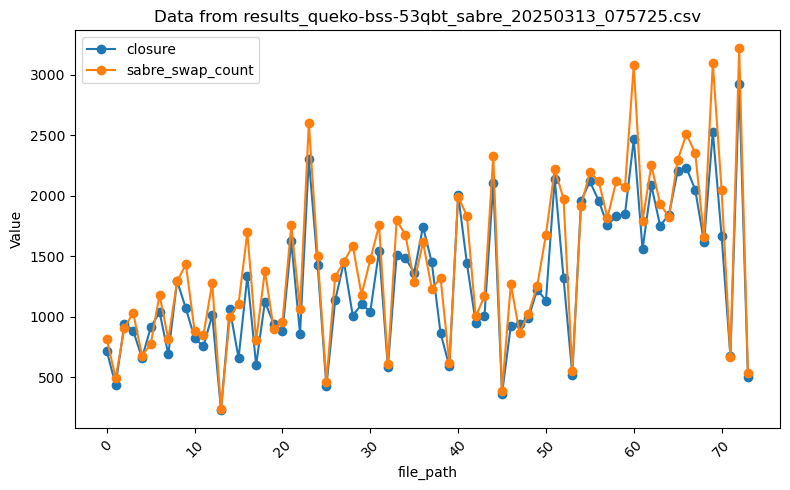

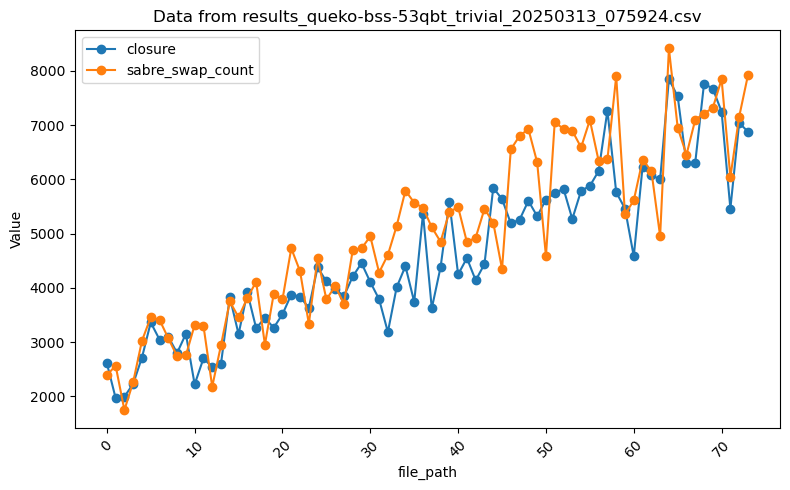

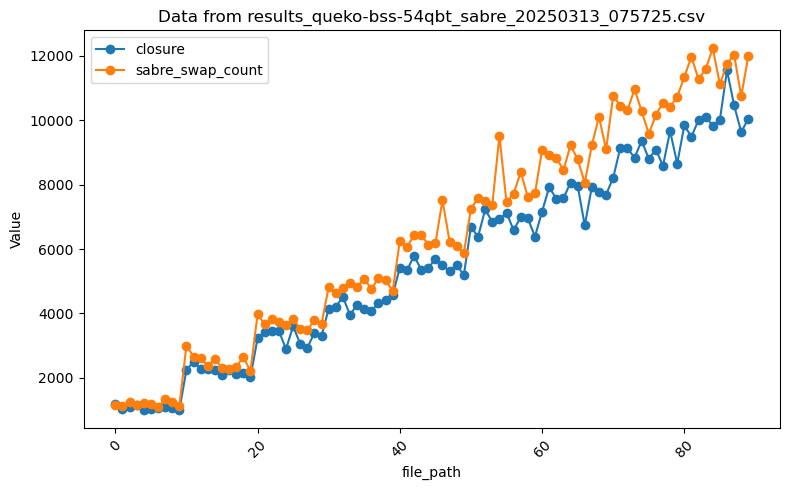

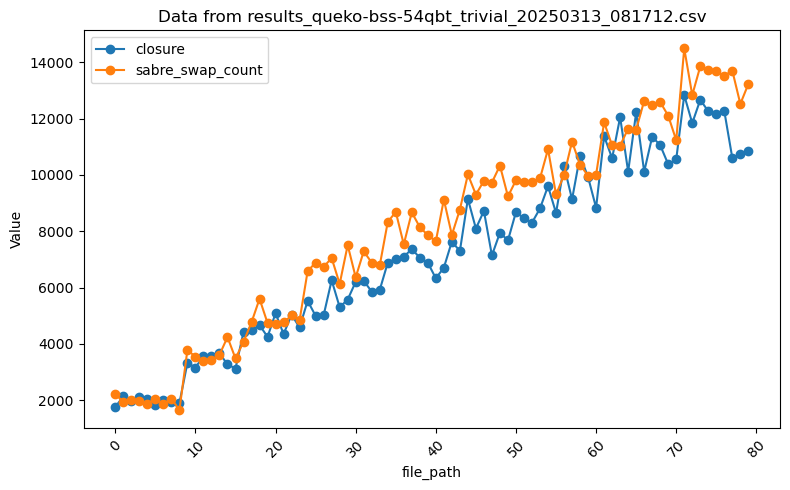

In [24]:
for csv_file in csv_files:
    # Read the CSV into a DataFrame
    df = pd.read_csv(csv_file)

    # Step 3: Sort each DataFrame by 'file_path' column
    df_sorted = df.sort_values(by="file_path")
    df_sorted.reset_index(drop=True, inplace=True)


    plt.figure(figsize=(8, 5))

    # plt.plot(df_sorted.index, df_sorted["decay"],
    #          label="decay", marker='o')
    # plt.plot(df_sorted.index, df_sorted["more_executed"],
    #          label="more_executed", marker='o')
    plt.plot(df_sorted.index, df_sorted["closure"],
             label="closure", marker='o')
    plt.plot(df_sorted.index, df_sorted["sabre_swap_count"],
             label="sabre_swap_count", marker='o')


    plt.title(f"Data from {os.path.basename(csv_file)}")
    plt.xlabel("file_path")
    plt.ylabel("Value")
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.legend()
    plt.tight_layout()  # Helps with label spacing

    # Step 5: Show or save the figure
    plt.show()


In [ ]:
better_trivial = 0
better_sabre_layout = 0

trivial = 0
sabre_layout = 0

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_sorted = df.sort_values(by="file_path").reset_index(drop=True)
    improvements = []
    # print(f"Results for file: {os.path.basename(csv_file)}")

    for idx, row in df_sorted.iterrows():
        closure_val = row['closure']
        sabre_val = row['sabre_swap_count']

        if closure_val < sabre_val:
            if 'sabre' in row['file_path']:
                better_sabre_layout += 1
            else:
                better_trivial += 1
            diff = sabre_val - closure_val
            improvements.append(diff)
        
        if 'sabre' in row['file_path']:
            sabre_layout += 1
        else:
            trivial += 1


    # if improvements:
    #     avg_improvement = sum(improvements) / len(improvements)
    #     ## print pourcentage of when closure is better
    #     print(f"closure is better in {len(improvements)/len(df_sorted)*100:.2f}% of the cases.")
    #     print(
    #         f"On average, when closure is better, it is better by {avg_improvement:.2f} swaps.\n")
    # else:
    #     print("No benchmark test shows closure as better than sabre_swap_count.\n")

print(f"Trivial Initial Mapping:")
print(f"closure is better in {better_trivial/(better_trivial+trivial)*100:.2f}% of the cases.")

print(f"closure is better in {better_sabre_layout/(better_sabre_layout+sabre_layout)*100:.2f}% of the cases.")

closure is better in 81.86% of the cases.
